In [1]:
import gwo
import math
import pandas as pd
from numpy import argmin
from copy import deepcopy
import quartzclock as qc

In [2]:
df = pd.read_csv('paths.csv', index_col=0, header=0)
n_vector = {}
for index, row in df.iterrows():
    n_vector[int(index)] = (row[0], row[1], row[2])

In [24]:
m_h = (1.5, 17.02)

l_max = 5.8
l_min = 1

h_min = 1/1000
q_min = 1000

C_s = 4
C_d = 0.9
k_s = 0.1
k_d = 0.04

u, v, w = 0.7, 0.2, 0.1

In [25]:
def get_distance(i, j):
    return math.sqrt((i[0] - j[0])** 2 + (i[1] - j[1])** 2)

def hardness(points):
    VECTORS = {3: {1: (points[0], points[1]),
                   2: (points[2], points[3]),
                   3: (points[4], points[5])},
               4: {1: (points[0], points[1]),
                   2: (points[2], points[3]),
                   3: (points[4], points[5]),
                   4: (points[6], points[7])},
               5: {1: (points[0], points[1]),
                   2: (points[2], points[3]),
                   3: (points[4], points[5]),
                   4: (points[6], points[7]),
                   5: (points[8], points[9])},
               6: {1: (points[0], points[1]),
                   2: (points[2], points[3]),
                   3: (points[4], points[5]),
                   4: (points[6], points[7]),
                   5: (points[8], points[9]),
                   6: (points[10], points[11])},
               7: {1: (points[0], points[1]),
                   2: (points[2], points[3]),
                   3: (points[4], points[5]),
                   4: (points[6], points[7]),
                   5: (points[8], points[9]),
                   6: (points[10], points[11]),
                   7: (points[12], points[13])}}
    
    m_vector = VECTORS[points[-1]]
    
    n_index = deepcopy(n_vector)

    for i, n in n_vector.items():
        distances = []

        for m in m_vector.values():
            distances.append(get_distance(m, n[0:2]))
        min_dist = min(distances)
        index = argmin(distances) + 1

        n_index[i] = (index, min_dist)
        
    def H():
        H_sum = 0
        
        for i, n in n_vector.items():
            H_sum += n[2] * h_min * math.exp(n_index[i][1] / l_max) if n_index[i][1] > l_max else n[2] * h_min
        
        return H_sum

    def S():
        storages = []
        
        for i in m_vector:
            storage = 0
            for ix, n in n_vector.items():
                if n_index[ix][0] == i:
                    storage += 1.2 * n[2]
            storages.append(storage)
        
        S_sum = sum(map(lambda x: C_s + k_s * (x / q_min)**(2 / 3), storages))
        
        return (S_sum, storages)

    def D():
        D_sum = 0

        for m in m_vector.values():
            D_sum += C_d + k_d * (get_distance(m, m_h) / l_min)
        
        return D_sum
    
    return u * H() + v * S()[0] + w * D()

In [26]:
yy = []
for i in [5]:
    upperbound = [30, 21] * i + [1]*8 + [i]
    lowerbound = [4, 0] * i + [1]*8 + [i]
    res = gwo.optimize(hardness, lowerbound, upperbound, size=1000, max_iter=100, show=False)
    # yy.append(res)
    # print('{}个物资点时：最小值{}'.format(i, res))


Iteration complete.
x = [18.13417761 21.         11.53730401 15.02330672 19.06190814  4.86832803
  4.13528525 12.45043351  9.63809403  2.55911233  1.          1.
  1.          1.          1.          1.          1.          1.
  5.        ].
f(x)_min = 43.3317566397524


In [28]:
print('物资点1: ({}, {})\n'.format(round(res[0], 3), round(res[1], 3)))
print('物资点2: ({}, {})\n'.format(round(res[2], 3), round(res[3], 3)))
print('物资点3: ({}, {})\n'.format(round(res[4], 3), round(res[5], 3)))
print('物资点4: ({}, {})\n'.format(round(res[6], 3), round(res[7], 3)))
print('物资点5: ({}, {})'.format(round(res[8], 3), round(res[9], 3)))
# print('物资点6: ({}, {})'.format(round(res[10], 3), round(res[11], 3)))
# print('物资点7: ({}, {})'.format(round(res[12], 3), round(res[13], 3)))

物资点1: (18.134, 21.0)

物资点2: (11.537, 15.023)

物资点3: (19.062, 4.868)

物资点4: (4.135, 12.45)

物资点5: (9.638, 2.559)


In [15]:
a={'x':[3,4,5,6,7],
# 'y':[50.3184, 46.2926, 45.7447, 46.1980, 47.1315],
# 'y':[46.1955, 44.2977, 44.8295, 45.8683, 46.7294],
'y':[57.4776, 49.9251, 49.0600, 49.4222, 48.5542],
'linewidth': 3,
'mode': 'plot',
'label':'l_max=4.9'}

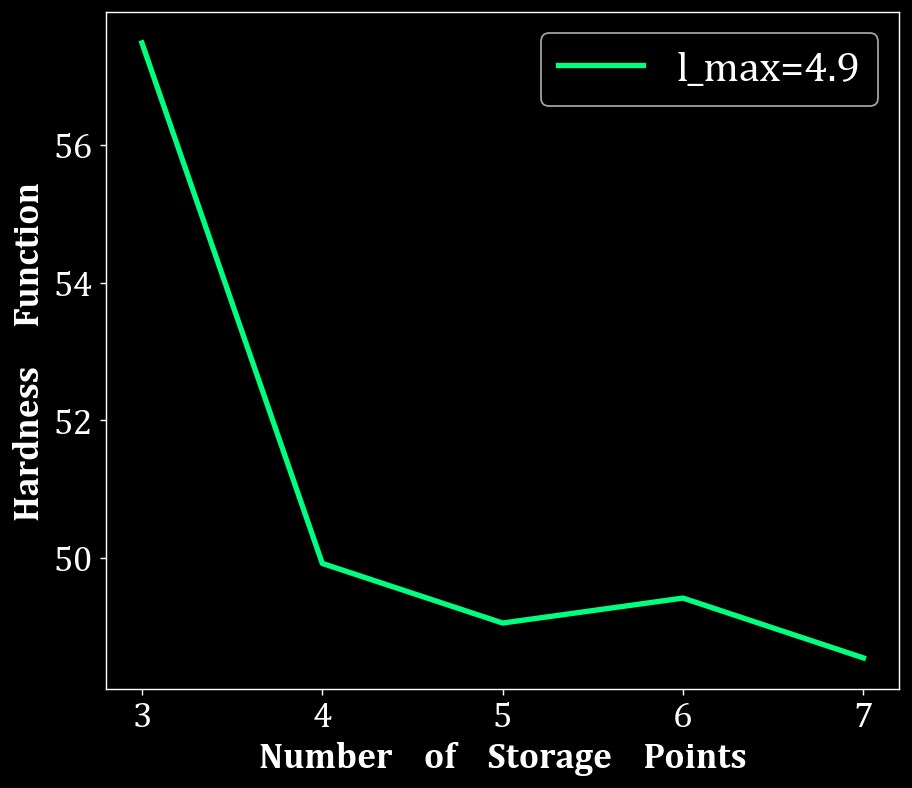

In [16]:
qc.plot([a],xlabel='Number    of    Storage    Points', ylabel='Hardness     Function', legend=True, legendsize=24,figsize=(8,7))